# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow cvzone numpy matplotlib

In [3]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      1.4.0
asttokens                    2.4.0
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.7.22
charset-normalizer           3.2.0
colorama                     0.4.6
comm                         0.1.4
contourpy                    1.1.1
cvzone                       1.6.1
cycler                       0.11.0
debugpy                      1.8.0
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  23.5.26
fonttools                    4.42.1
gast                         0.4.0
google-auth                  2.23.0
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.58.0
h5py                         3.9.0
idna                         3.4
ipykernel                    6.25.2
ipython                      8.15.0
jedi

In [4]:
import tensorflow as tf
import os

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
import cv2
import imghdr

C:\Users\DELL\AppData\Local\Temp\ipykernel_5252\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


# 2. Remove dodgy images

In [2]:
import cv2
import imghdr

C:\Users\DELL\AppData\Local\Temp\ipykernel_13664\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [395]:
data_dir = 'Data_Set'

In [396]:
os.listdir(data_dir)

['False', 'True']

In [1]:
img_try = cv2.imread(os.path.join(data_dir, image_class, '122383581_xl.jpg'))

NameError: name 'cv2' is not defined

In [408]:
img_try.shape

(800, 1200, 3)

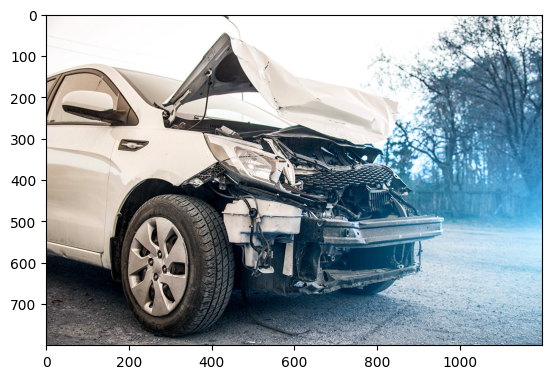

In [409]:
plt.imshow(img_try) 

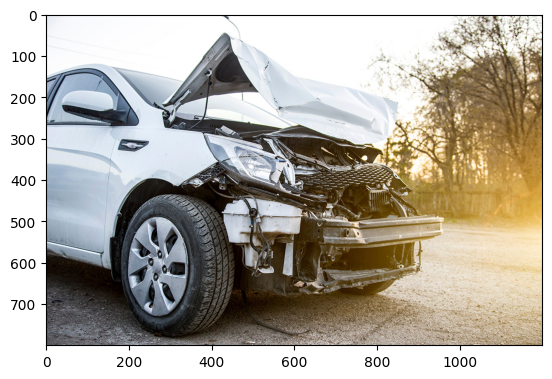

In [410]:
plt.imshow(cv2.cvtColor(img_try, cv2.COLOR_BGR2RGB))

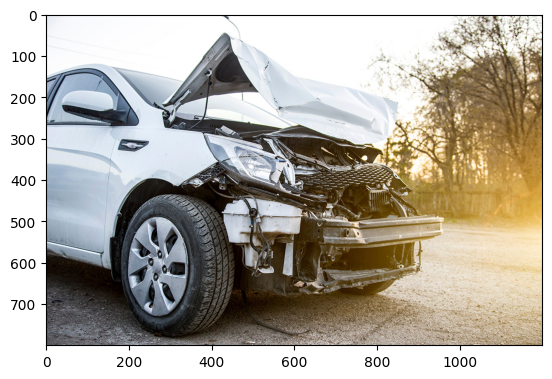

In [411]:
plt.imshow(cv2.cvtColor(img_try, cv2.COLOR_BGR2RGB))
plt.show()

In [412]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [413]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list Data_Set\False\07482342-e465-411b-818f-6a8fe36f7272.png
Image not in ext list Data_Set\False\0x0.png
Image not in ext list Data_Set\False\10google2-jumbo.png
Image not in ext list Data_Set\False\123acbeb-56aa-4d9a-b87b-5858861c6279.png
Image not in ext list Data_Set\False\1383327500000-692-FreewaySlovenia.png
Image not in ext list Data_Set\False\2014_chevrolet_ss_daytona-018-16_9.png
Image not in ext list Data_Set\False\20190501-speed-limit-toronto.png
Image not in ext list Data_Set\False\20220422-ontario-speed-limits.png
Image not in ext list Data_Set\False\353756471_917866242639833_2194689507155058769_n.png
Image not in ext list Data_Set\False\4368.png
Image not in ext list Data_Set\False\ba841c97-bbc9-4b07-b42d-b6047c12f65a.png
Image not in ext list Data_Set\False\black_chevrolet-malibu_2022_4701_main_4154dc8b65235dc45d2f3a1ab00e5c7b.png
Image not in ext list Data_Set\False\c2d39e7e-2401-4dc8-95a4-f6891f0f6d8f.png
Image not in ext list Data_Set\False\d78bf018-0

# 3. Loading Data

In [32]:
import numpy as np
from matplotlib import pyplot as plt

Important, write : tf.keras.utils.image_dataset_from_directory??,to see its documentation we put "??"

it is allow us to build a pipline rather than uploading the data directly to the memory, very useful for large data, it also resize images and do the labels

data = tf.keras.utils.image_dataset_from_directory('Data_Set')

In [414]:
data = tf.keras.utils.image_dataset_from_directory('Data_Set', shuffle=False,)

Found 180 files belonging to 2 classes.


In [422]:
data = data.shuffle(1000, seed=100, reshuffle_each_iteration=False)

because the data set is not uploaded to the memory directly, as we used the above function, .as_numpy_iterator and the following line of codes will allow us to accses the data

In [423]:
data_iterator = data.as_numpy_iterator()

Class 0 = No Accedent \
Class 1 = Accedent Detected

In [424]:
batch = data_iterator.next()

batch contain to set of data, images and their classes, the clasess are either 0 or 1

exute the above line of code, then exute on the below 'for loop' to get another sample photos

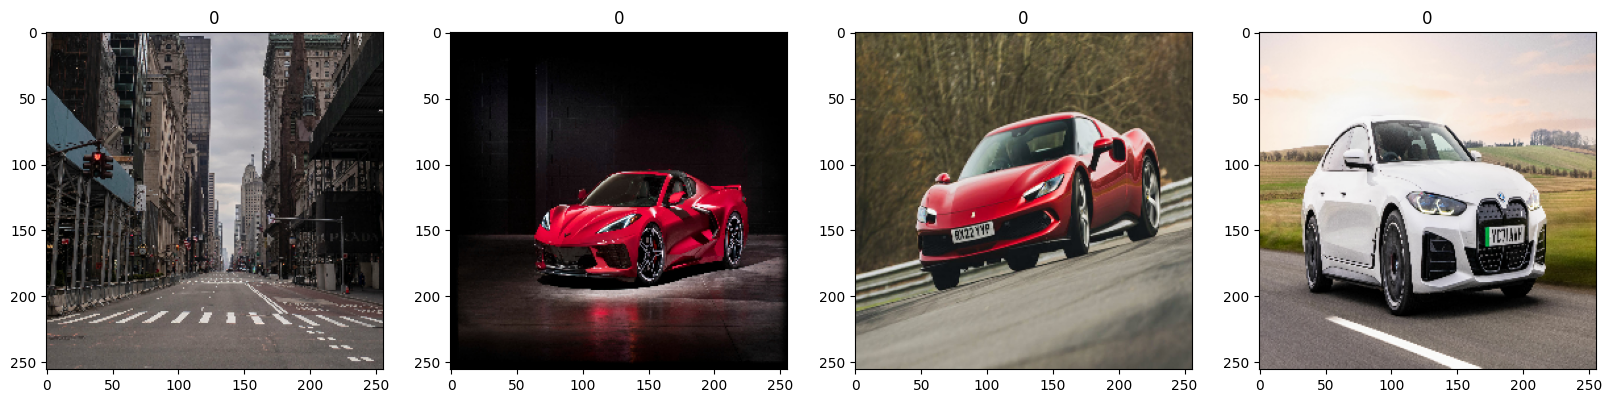

In [425]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Preprocessing Data

In [200]:
batch[0].min()

0.0

In [201]:
batch[0].max()

255.0

We will see why we need to know the 255

In [51]:
scaled = batch[0]/255

In [52]:
scaled.max()

1.0

It is to scale the data from 0 to 1 instead of 0 - 255, however, we are not going to make it manually one by one as above 

## 4.1 scale data

In [426]:
data = data.map(lambda x,y: (x/255, y))

In [427]:
data.as_numpy_iterator().next()

(array([[[[0.3959559 , 0.34105393, 0.30575982],
          [0.38474265, 0.3298407 , 0.29454657],
          [0.37438726, 0.3214461 , 0.28566176],
          ...,
          [0.09810049, 0.09810049, 0.09123775],
          [0.09626225, 0.09626225, 0.08841912],
          [0.08425245, 0.08425245, 0.08425245]],
 
         [[0.36893383, 0.31403187, 0.27873775],
          [0.3867647 , 0.33186275, 0.29656863],
          [0.35955882, 0.30661765, 0.27132353],
          ...,
          [0.08645833, 0.08645833, 0.08645833],
          [0.09558824, 0.09558824, 0.09558824],
          [0.09607843, 0.09607843, 0.09607843]],
 
         [[0.37653187, 0.3216299 , 0.2863358 ],
          [0.36286765, 0.3079657 , 0.27267158],
          [0.34938726, 0.29644608, 0.26115197],
          ...,
          [0.09368873, 0.09368873, 0.09381127],
          [0.08676471, 0.08676471, 0.08676471],
          [0.10171568, 0.10171568, 0.10171568]],
 
         ...,
 
         [[0.3651348 , 0.34552696, 0.33376226],
          [0.35459

each data will be scaled automatically in the pipline

## 4.2 Split Data

In [428]:
len(data)

6

We have 8 batch of data, each batch has around 32 images, we will allocate 70% for training, 20% for validation, 10% for testing

In [464]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1)

using int so we get a full batch (not float), as we see 10% of 8 is 0.8 and python will corect it to 0, so we will +1, same for the 20% 

In [465]:
print(train_size, val_size, test_size)
print(train_size + val_size + test_size)

4 2 0
6


The following code will split data to train, validation, test.  'take' function will take the data from data test while 'skip' will skip the data sepecified

In [466]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 5. DEEP MODEL

### 5.1  Build the Deep Learning Model

In [208]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [467]:
model = Sequential()

In [468]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [469]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [470]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 30, 30, 16)       

### 5.2 Training

In [471]:
logdir='logs'

In [472]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [473]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 6s 1s/step - loss: 1.7767 - accuracy: 0.3750 - val_loss: 1.5713 - val_accuracy: 0.0000e+00
Epoch 2/20
4/4 [==============================] - 5s 1s/step - loss: 0.5436 - accuracy: 0.6250 - val_loss: 0.7322 - val_accuracy: 0.0000e+00
Epoch 3/20
4/4 [==============================] - 5s 1s/step - loss: 0.6780 - accuracy: 0.6250 - val_loss: 0.7084 - val_accuracy: 0.0000e+00
Epoch 4/20
4/4 [==============================] - 5s 1s/step - loss: 0.6862 - accuracy: 0.6250 - val_loss: 0.7086 - val_accuracy: 0.0000e+00
Epoch 5/20
4/4 [==============================] - 5s 1s/step - loss: 0.6874 - accuracy: 0.6250 - val_loss: 0.7203 - val_accuracy: 0.0000e+00
Epoch 6/20
4/4 [==============================] - 5s 1s/step - loss: 0.6840 - accuracy: 0.6250 - val_loss: 0.7433 - val_accuracy: 0.0000e+00
Epoch 7/20
4/4 [==============================] - 5s 1s/step - loss: 0.6814 - accuracy: 0.6250 - val_loss: 0.7835 - val_accuracy: 0.0000e+00
Epoch 8/20
4/

Ideally, we should see Losses goes down and accuracies goes up for both training and validation data

In [441]:
hist.history

{'loss': [9.230072021484375,
  0.38828420639038086,
  0.7646648287773132,
  0.6976756453514099,
  0.6845154166221619,
  0.6676437258720398,
  0.6594160199165344,
  0.6509701013565063,
  0.638370156288147,
  0.6211085319519043,
  0.6003950834274292,
  0.5617822408676147,
  0.5278962850570679,
  0.48931005597114563,
  0.4328816831111908,
  0.39380237460136414,
  0.3404269218444824,
  0.2971687614917755,
  0.241596519947052,
  0.19551825523376465],
 'accuracy': [0.625,
  0.921875,
  0.125,
  0.625,
  0.625,
  0.625,
  0.625,
  0.625,
  0.640625,
  0.640625,
  0.6484375,
  0.7421875,
  0.8125,
  0.8203125,
  0.8515625,
  0.8671875,
  0.875,
  0.890625,
  0.9140625,
  0.9296875],
 'val_loss': [7.633792877197266,
  0.5704793334007263,
  0.7537892460823059,
  0.8189497590065002,
  0.8631289601325989,
  0.8748037815093994,
  0.8805516362190247,
  0.883695125579834,
  0.8917277455329895,
  0.8925615549087524,
  0.885617733001709,
  0.8569979667663574,
  0.840965747833252,
  0.8284125328063965,


### 5.3 Plot Performance

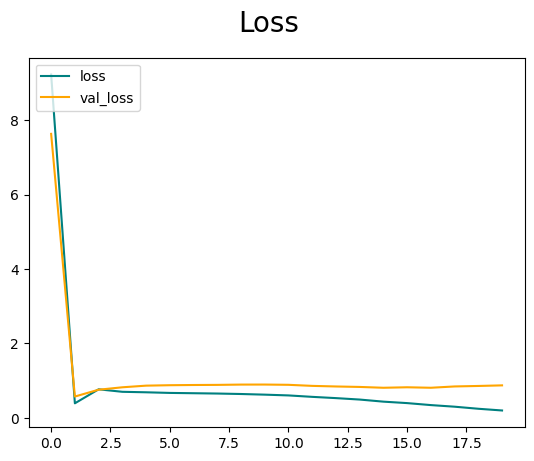

In [442]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

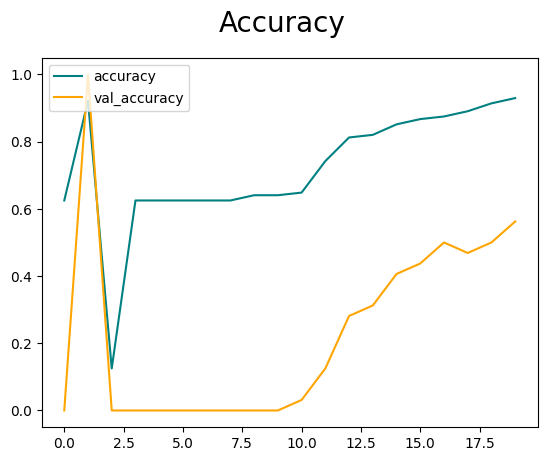

In [443]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### 5.4 Evaluate Performance

#### 5.4.1 Evaluate using the test partion of data set

In [219]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [444]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [445]:
len(test)

1

In [446]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 160ms/step


In [447]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.4, shape=(), dtype=float32) tf.Tensor(0.4, shape=(), dtype=float32)


In [448]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:1.0, Recall: 0.4000000059604645, Accuracy: 0.4000000059604645


These parametrs are between 0 and 1, so 1 is the hihgest 

#### 5.4.2 Test using external data

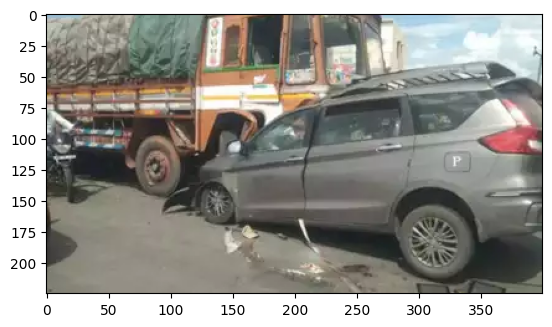

In [460]:
img = cv2.imread('yt.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
resize = tf.image.resize(img, (256,256))

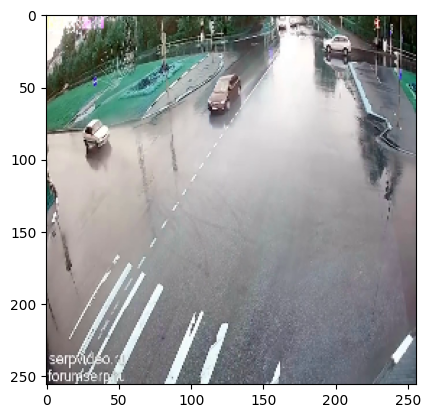

In [457]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [461]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 62ms/step


In [463]:
yhat

array([[0.34548622]], dtype=float32)

In [462]:
if yhat > 0.5: 
    print(f'Accedent detected')
else:
    print(f'No Accedent Detected')

No Accedent Detected


# 6. Save the Model

In [378]:
from tensorflow.keras.models import load_model

In [379]:
model.save(os.path.join('models','AccidentsModel.h5'))

C:\ImageClassification\imageclassification\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [380]:
new_model = load_model(os.path.join('models','AccidentsModel.h5'))

In [381]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 106ms/step


In [382]:
if yhat_new > 0.5: 
    print(f'Accedent detected')
else:
    print(f'No Accedent Detected')

No Accedent Detected
